In [ ]:
#Decision Tree 실습
#EDA
#Linear Regression
#Decision Tree


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#import dataset
dataset=pd.read_csv('happy.csv')
dataset.keys()

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
dataset

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
print(dataset.shape)


(156, 9)


In [ ]:
df=pd.DataFrame(dataset)
df=df.rename(columns={"GDP per capita":"GDP"})
del df['Country or region']

df['target']=dataset.Score

df=df.astype({'target':'int'})
#df=df.round({'target':0})
df.head(100)

,Overall rank,Score,GDP,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,target
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,8.0
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,8.0
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,8.0
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7.0
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,7.0
...,...,...,...,...,...,...,...,...,...
95,96,5.044,0.549,0.910,0.331,0.381,0.187,0.037,5.0
96,97,5.011,1.092,1.513,0.815,0.311,0.081,0.004,5.0
97,98,4.996,0.611,0.868,0.486,0.381,0.245,0.040,5.0
98,99,4.944,0.569,0.808,0.232,0.352,0.154,0.090,5.0


In [ ]:
df['target']

0      8.0
1      8.0
2      8.0
3      7.0
4      7.0
      ... 
151    3.0
152    3.0
153    3.0
154    3.0
155    3.0
Name: target, Length: 156, dtype: float64

In [ ]:
#행번호로 행 읽기
#데이터 분포 확인
df.iloc[:,-1].value_counts()

6.0    49
5.0    48
4.0    26
7.0    21
3.0     9
8.0     3
Name: target, dtype: int64

In [ ]:
print(df.iloc[0])

Overall rank                    1.000
Score                           7.769
GDP                             1.340
Social support                  1.587
Healthy life expectancy         0.986
Freedom to make life choices    0.596
Generosity                      0.153
Perceptions of corruption       0.393
target                          8.000
Name: 0, dtype: float64


In [ ]:
print(df.iloc[-1])

Overall rank                    156.000
Score                             2.853
GDP                               0.306
Social support                    0.575
Healthy life expectancy           0.295
Freedom to make life choices      0.010
Generosity                        0.202
Perceptions of corruption         0.091
target                            3.000
Name: 155, dtype: float64


In [ ]:
#NaN값 확인
df.isnull().any()

Overall rank                    False
Score                           False
GDP                             False
Social support                  False
Healthy life expectancy         False
Freedom to make life choices    False
Generosity                      False
Perceptions of corruption       False
target                          False
dtype: bool

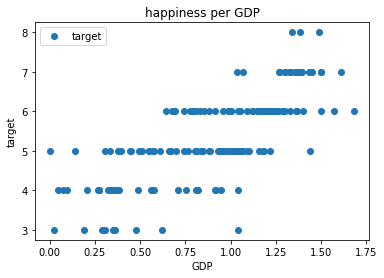

In [ ]:
df.plot(x='GDP',y='target',style='o');
plt.title('happiness per GDP')
plt.ylabel('target')
plt.xlabel('GDP')
plt.show()

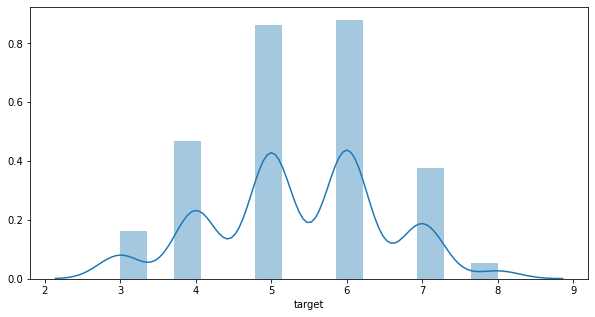

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['target'])
plt.show()

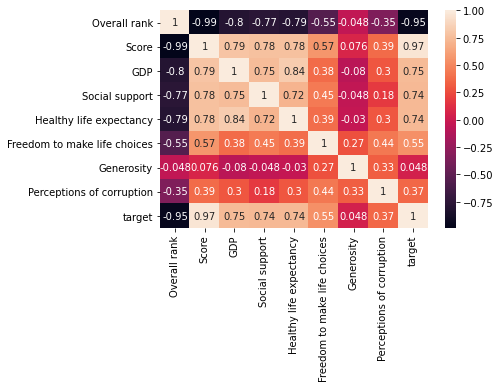

In [ ]:
correlation_matrix=df.corr()
sns.heatmap(data=correlation_matrix,annot=True)

In [ ]:
df.shape

(156, 9)

#Modeling


In [ ]:
X=df.drop(columns=['target'])
Y=df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(109, 8)
(47, 8)
(109,)
(47,)


In [ ]:
#선형 회귀분석 모델 생성
model = LinearRegression()
#모델에 X,Y 값을 적용
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#예측 만들기
Y_pred_train=model.predict(X_train)
Y_pred_test=model.predict(X_test)

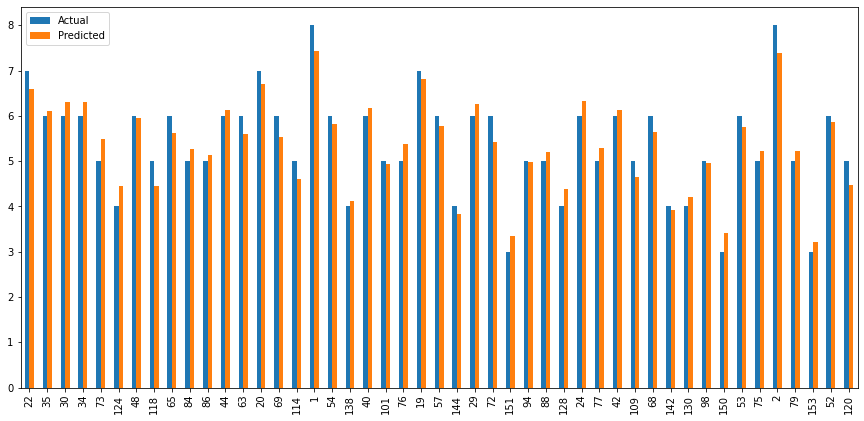

In [ ]:
result=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred_test})
result.head(80).plot(kind='bar',figsize=(15,7))
plt.show()

#Evaluate Model

In [ ]:
print("Test set")
print('Mean Squared Error :', metrics.mean_squared_error(Y_test, Y_pred_test))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)))

Test set
Mean Squared Error : 0.10467158248054605
Root Mean Squared Error : 0.3235298788064961


In [ ]:
print("Train Set")
print("Mean Squared Error :", metrics.mean_squared_error(Y_train, Y_pred_train))
print("Root Mean Squared Error :", np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)))

Train Set
Mean Squared Error : 0.07630108062591087
Root Mean Squared Error : 0.2762265023959701


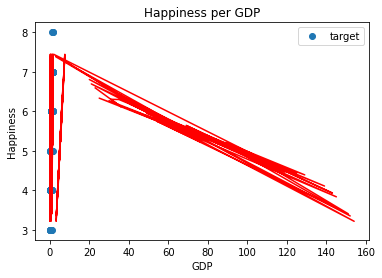

In [ ]:
df.plot(x='GDP',y='target',style='o') # 데이터셋
plt.title('Happiness per GDP')
plt.xlabel('GDP')
plt.ylabel('Happiness')
plt.plot(X_test,Y_pred_test,color='r') #선형 회귀 선을 그립니다
plt.show()

#decision tree

In [ ]:
df.columns

Index(['Overall rank', 'Score', 'GDP', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'target'],
      dtype='object')

In [ ]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(109, 8) (47, 8)
(109,) (47,)


In [ ]:
model=tree.DecisionTreeClassifier(criterion='entropy',max_depth=None, max_leaf_nodes=None, min_samples_split=2,min_samples_leaf=1, max_features=None)
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# prediction
prediction = model.predict(X_test)

# 
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

         3.0       1.00      1.00      1.00         3
         4.0       1.00      1.00      1.00         6
         5.0       1.00      1.00      1.00        15
         6.0       1.00      0.94      0.97        18
         7.0       0.60      1.00      0.75         3
         8.0       1.00      0.50      0.67         2

    accuracy                           0.96        47
   macro avg       0.93      0.91      0.90        47
weighted avg       0.97      0.96      0.96        47



In [ ]:
df.columns

Index(['Overall rank', 'Score', 'GDP', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'target'],
      dtype='object')

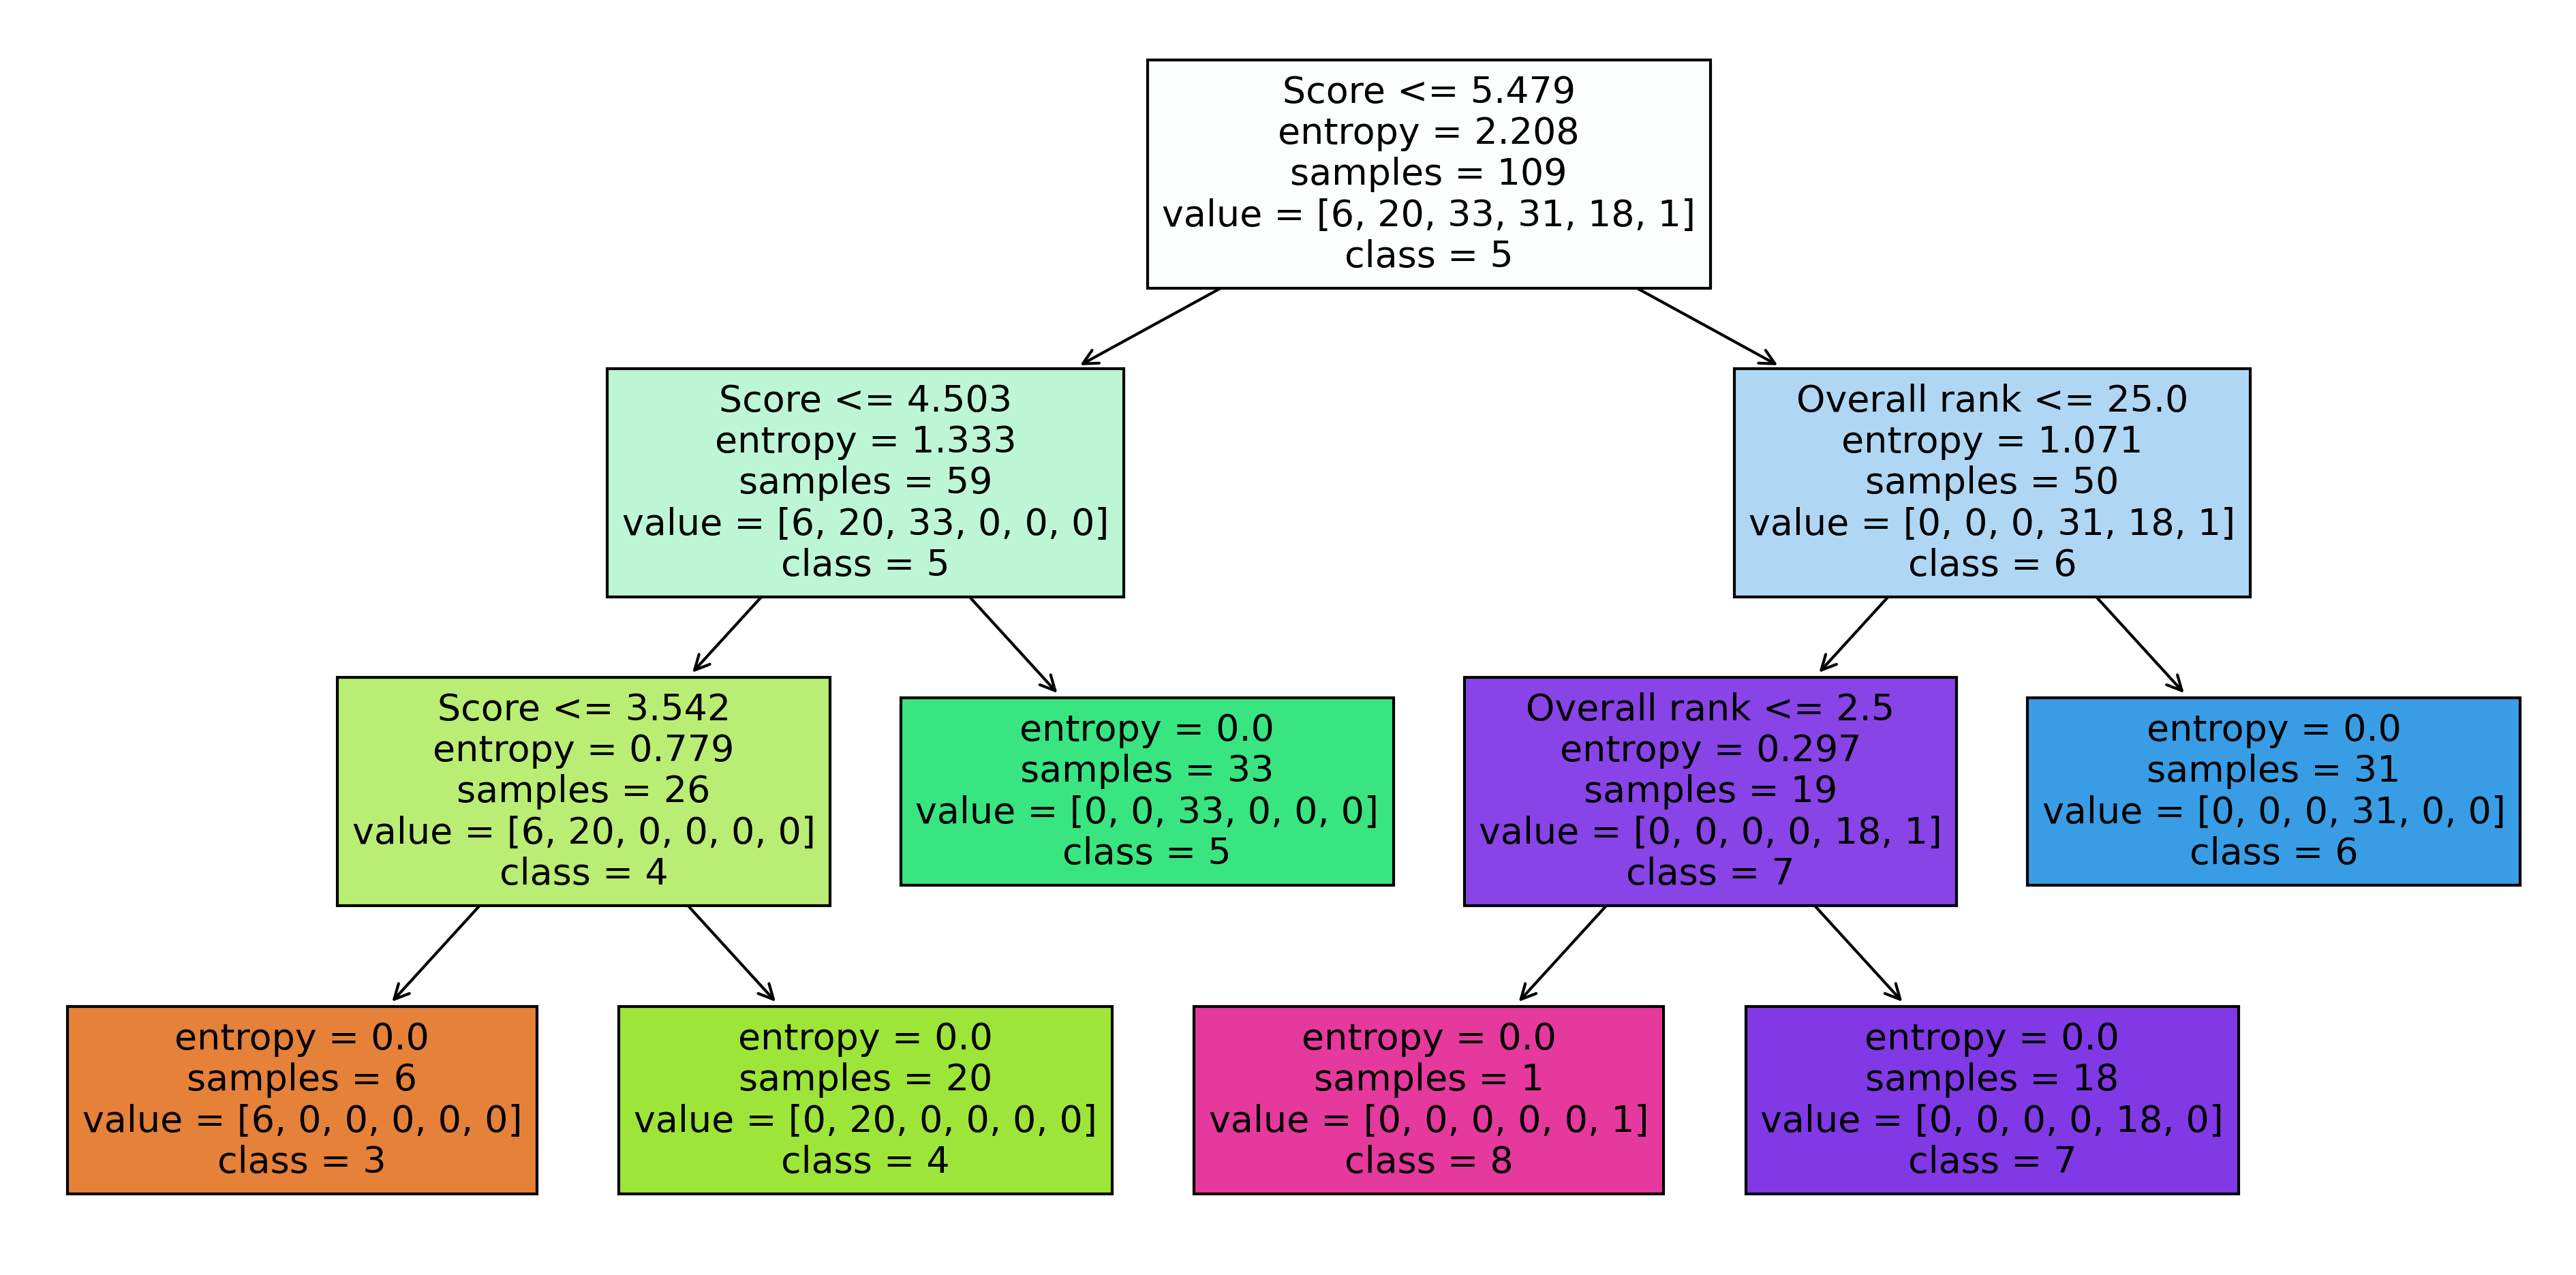

In [ ]:
features=['Overall rank', 'Score', 'GDP', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
target=['3','4','5','6','7','8']
fig, axes = plt.subplots(nrows=1, ncols = 1, figsize = (16,8),dpi = 300)

tree.plot_tree(model,feature_names = features,
              class_names = target,filled = True)

fig.savefig('imagename.png')